Using the dataset for the risk of heart attack with class imbalance:

1 . Create a logistic regression model and measure the performance of it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
heart_attack = pd.read_csv("heart_attack.csv")
heart_attack

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,negative
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,negative
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,negative
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,negative
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,64.0,1.0,4.0,145.0,212.0,0.0,2.0,132.0,0.0,2.0,2.0,2.0,6.0,positive
173,38.0,1.0,1.0,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,0.0,7.0,positive
174,61.0,1.0,4.0,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,1.0,3.0,positive
175,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,positive


In [3]:
heart_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    float64
 1   sex       177 non-null    float64
 2   cp        177 non-null    float64
 3   trestbps  177 non-null    float64
 4   chol      177 non-null    float64
 5   fbs       177 non-null    float64
 6   restecg   177 non-null    float64
 7   thalach   177 non-null    float64
 8   exang     177 non-null    float64
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    float64
 11  ca        177 non-null    object 
 12  thal      177 non-null    object 
 13  num       177 non-null    object 
dtypes: float64(11), object(3)
memory usage: 19.5+ KB


In [4]:
heart_attack[(heart_attack['ca'] == '<null>') | (heart_attack['thal'] == '<null>')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
44,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,<null>,negative
85,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,<null>,3.0,negative
142,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,<null>,7.0,negative
146,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,<null>,3.0,negative


In [5]:
heart_attack.drop(heart_attack[(heart_attack['ca'] == '<null>') | (heart_attack['thal'] == '<null>')].index , axis=0 , 
                                     inplace = True)

In [6]:
heart_attack[['ca','thal']] = heart_attack[['ca','thal']].astype(float)

In [7]:
heart_attack['num'] = heart_attack['num'].replace({'negative' : 0 , 'positive' : 1})

In [8]:
heart_attack.nunique()

age          41
sex           2
cp            4
trestbps     41
chol        110
fbs           2
restecg       3
thalach      69
exang         2
oldpeak      31
slope         3
ca            4
thal          3
num           2
dtype: int64

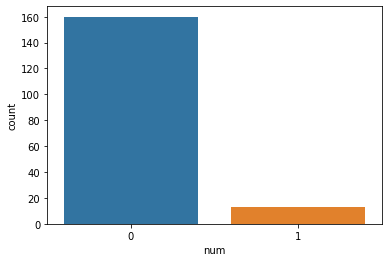

negative ratio : % 92.48554913294798
positive ratio : % 7.514450867052023


In [15]:
plt.figure()
sns.countplot(heart_attack['num'])
plt.show()
print("negative ratio : % {}".format((100 * len(heart_attack[heart_attack['num'] == 0])) / len(heart_attack['num'])))
print("positive ratio : % {}".format((100 * len(heart_attack[heart_attack['num'] == 1])) / len(heart_attack['num'])))

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [38]:
def create_model (X , Y) :
    X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 456)
    log_reg = LogisticRegression()
    log_reg.fit(X_train , Y_train)
    
    train_pred = log_reg.predict(X_train)
    test_pred = log_reg.predict(X_test)
    
    print("TRAİN SET")
    print("train accuracy : {}".format(accuracy_score(Y_train ,train_pred)))
    print("train precision: {}".format(precision_score(Y_train , train_pred)))
    print("train recall   : {}".format(recall_score(Y_train , train_pred)))
    print("train f1-score : {}".format(f1_score(Y_train , train_pred)))
    
    print("TEST SET")
    print("test accuracy  : {}".format(accuracy_score(Y_test ,test_pred)))
    print("test precision : {}".format(precision_score(Y_test , test_pred)))
    print("test recall    : {}".format(recall_score(Y_test , test_pred)))
    print("test f1-score  : {}".format(f1_score(Y_test , test_pred)))
    print("--"*27)
    print("TRAİN SET")
    print(classification_report(Y_train , train_pred))
    print("--"*27)
    print("TEST SET")
    print(classification_report(Y_test , test_pred))
    
    

In [39]:
X = heart_attack[['age','sex','chol']]
Y = heart_attack['num']
create_model(X , Y)

TRAİN SET
train accuracy : 0.9347826086956522
train precision: 1.0
train recall   : 0.1
train f1-score : 0.18181818181818182
TEST SET
test accuracy  : 0.9142857142857143
test precision : 0.0
test recall    : 0.0
test f1-score  : 0.0
------------------------------------------------------
TRAİN SET
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       128
           1       1.00      0.10      0.18        10

    accuracy                           0.93       138
   macro avg       0.97      0.55      0.57       138
weighted avg       0.94      0.93      0.91       138

------------------------------------------------------
TEST SET
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        32
           1       0.00      0.00      0.00         3

    accuracy                           0.91        35
   macro avg       0.46      0.50      0.48        35
weighted avg       0.84      0.91      

2 . By experimenting with different methods and class ratios; overcome class imbalance, determine the best performing method and class ratio.

Örneklem sayısı az olan sınıfın örneği çok az olduğu için down sampling - örneklem azaltma metodunu kullanmak modelin eğitim performansı için iyi olmayacağından up sampling metoduyla örneklem sayısını arttırdım. SMOTE ve ADASYN algoritmalarıyla sentetik veri ürettim.

# Up Sampling

In [22]:
from sklearn.utils import resample

In [40]:
negative = heart_attack[heart_attack['num'] == 0]
positive = heart_attack[heart_attack['num'] == 1]

In [41]:
positive_upsampling = resample(positive , replace = True , n_samples = len(negative) , random_state = 456)
upsampled_df = pd.concat([negative , positive_upsampling])

In [42]:
upsampled_df['num'].value_counts()

0    160
1    160
Name: num, dtype: int64

In [43]:
X = upsampled_df[['age','sex','chol']]
Y = upsampled_df['num']
create_model(X , Y)

TRAİN SET
train accuracy : 0.76953125
train precision: 0.7426470588235294
train recall   : 0.808
train f1-score : 0.7739463601532568
TEST SET
test accuracy  : 0.71875
test precision : 0.7297297297297297
test recall    : 0.7714285714285715
test f1-score  : 0.75
------------------------------------------------------
TRAİN SET
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       131
           1       0.74      0.81      0.77       125

    accuracy                           0.77       256
   macro avg       0.77      0.77      0.77       256
weighted avg       0.77      0.77      0.77       256

------------------------------------------------------
TEST SET
              precision    recall  f1-score   support

           0       0.70      0.66      0.68        29
           1       0.73      0.77      0.75        35

    accuracy                           0.72        64
   macro avg       0.72      0.71      0.71        64
weighted av

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
X = heart_attack[['age','sex','chol']]
Y = heart_attack['num']

sm = SMOTE(random_state = 27)
X_smote , Y_smote = sm.fit_resample(X ,Y)
create_model(X_smote , Y_smote)

TRAİN SET
train accuracy : 0.71875
train precision: 0.6906474820143885
train recall   : 0.768
train f1-score : 0.7272727272727274
TEST SET
test accuracy  : 0.734375
test precision : 0.7647058823529411
test recall    : 0.7428571428571429
test f1-score  : 0.7536231884057971
------------------------------------------------------
TRAİN SET
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       131
           1       0.69      0.77      0.73       125

    accuracy                           0.72       256
   macro avg       0.72      0.72      0.72       256
weighted avg       0.72      0.72      0.72       256

------------------------------------------------------
TEST SET
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        29
           1       0.76      0.74      0.75        35

    accuracy                           0.73        64
   macro avg       0.73      0.73      0.73        64

In [46]:
from imblearn.over_sampling import ADASYN

In [47]:
X = heart_attack[['age','sex','chol']]
Y = heart_attack['num']

ad = ADASYN()
X_adasyn , Y_adasyn = ad.fit_resample(X, Y)

create_model(X_adasyn , Y_adasyn)

TRAİN SET
train accuracy : 0.71484375
train precision: 0.6992481203007519
train recall   : 0.7380952380952381
train f1-score : 0.7181467181467183
TEST SET
test accuracy  : 0.6923076923076923
test precision : 0.7272727272727273
test recall    : 0.6857142857142857
test f1-score  : 0.7058823529411764
------------------------------------------------------
TRAİN SET
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       130
           1       0.70      0.74      0.72       126

    accuracy                           0.71       256
   macro avg       0.72      0.72      0.71       256
weighted avg       0.72      0.71      0.71       256

------------------------------------------------------
TEST SET
              precision    recall  f1-score   support

           0       0.66      0.70      0.68        30
           1       0.73      0.69      0.71        35

    accuracy                           0.69        65
   macro avg       0.69    

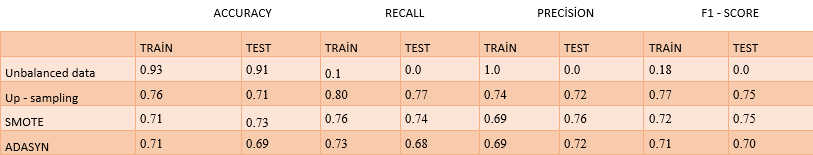

Up sampling , SMOTE ve ADASYN algoritmaları birbirine çok yakın sonuçlar verdi. Ama SMOTE algoritmasının diğerlerine göre küçük de olsa daha iyi olduğunu söyleyebilirim.